<a href="https://colab.research.google.com/github/skywalker290/Misleading-Video-Detection-Model/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Data

1. Convert Different Language Comments into English

In [25]:
# Library Instalation
%pip install deep_translator langid langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=3048605d4ddf15910a388604a53d2d88719b30370c41248753d084f0ead5d9d4
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [73]:
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

Text Traslate Function

In [39]:
from deep_translator import GoogleTranslator
import langid

def translate(text):

  # This function Transalted Recieved Text in diffrent Languages
  # into English Language.


  if ((not pd.isna(text)) and langid.classify(text)[0] != 'en'):
    translator = GoogleTranslator(source='auto', target='en')
    return translator.translate(text)
  else:
    return text


Dataframe Translate Function

In [74]:
def dataframe_translate(df,columns):
# This Function takes Dataframe, Column List and translate those column's data into English language.
# Returns Translated Dataframe.
    not_translated=[]
    df1=df
    with tqdm.tqdm(total=len(df)*len(columns), desc="Translating") as progress_bar:
        for col in columns:
            for i in range(len(df)):
                try:
                    df1.loc[i,col]=translate(df.loc[i,col])

                except Exception as e:
                    print(f"Error translating row {i + 1}: {e}")
                    not_translated.append(i)

                progress_bar.update(1)
    if(len(not_translated)>0):print("Not Translated Rows:", not_translated)
    return df1


Fake Real Bar graph

In [ ]:
def fake_real_graph(df):
  # This Function plots a bar graph for REAL and FAKE frequency.
  df.groupby('LABEL').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
fvc = pd.read_csv("Datasets/Updated_FVC.csv")
mvd = pd.read_csv("Datasets/Updated_MVD.csv")
bolly = pd.read_csv("Datasets/Updated_BollyBAIT.csv")
combined = pd.read_csv("Datasets/Updated_Combined.csv")

In [ ]:
fvc

,video_id,LABEL,title,description,likes,comments,views
0,Y7MJlmbnLQA,FAKE,بنت سقطت في حمم بركانيه 🙀,اللهم اجرنا من عذاب جهنم,66,42,18201
1,AEPvSo8bE2I,FAKE,Michel & Sven - Der Tischdeckentrick - Teil 4 ...,http://www.facebook.com/michelundsven\nhttp://...,92529,0,25398348
2,CXOU10WBogs,FAKE,Backflip and almost hit by car!,Jukin Media Verified (Original)\n* For licensi...,384,26,169870
3,ZoHAf7VtIhA,FAKE,Shark Attack - Cam Girl Bitten off Florida Coast,Camsoda model Molly Cavalli was bitten while b...,8608,1930,17784032
4,RXF5yZZe8nQ,FAKE,American Airline plane catches fire on runway,Passengers run for survival as a plane catches...,36,24,4682
...,...,...,...,...,...,...,...
242,XvMoYEUVcB4,REAL,Dolphin Seen at Mahalaxmi Mumbai,Today people seen Dolphins In Mahalaxmi Mumbai...,11,0,971
243,lYFpga7kJxE,REAL,Angry mob throwing stones on mumbai local trai...,Angry mob throwing stones on mumbai local trai...,3275,418,2439095
244,WNjFFTQsIAg,REAL,Woman carted off by Muslim horde into subway s...,"No idea where this was filmed, some are saying...",43,22,4943
245,x76VEPXYaI0,REAL,GoPro: Backflip Over 72ft Canyon - Kelly McGar...,Shot 100% on the HD HERO3+® camera from ‪http:...,2561286,58142,224438799


# Translate FVC Dataset

In [ ]:
df = fvc
df=dataframe_translate(df,['title','description'])
df

Translating:  53%|█████▎    | 262/494 [00:50<00:39,  5.80it/s]

Error translating row 14: Request exception can happen due to an api connection error. Please check your connection and try again


Translating: 100%|██████████| 494/494 [01:32<00:00,  5.32it/s]


,video_id,LABEL,title,description,likes,comments,views
0,Y7MJlmbnLQA,FAKE,A girl fell into lava 🙀,"Oh God, save us from the torment of hell",66,42,18201
1,AEPvSo8bE2I,FAKE,Michel & Sven - The Table Cloth Trick - Part 4...,http://www.facebook.com/michelundsven\nhttp://...,92529,0,25398348
2,CXOU10WBogs,FAKE,Backflip and almost hit by car!,Jukin Media Verified (Original)\n* For licensi...,384,26,169870
3,ZoHAf7VtIhA,FAKE,Shark Attack - Cam Girl Bitten off Florida Coast,Camsoda model Molly Cavalli was bitten while b...,8608,1930,17784032
4,RXF5yZZe8nQ,FAKE,American Airline plane catches fire on runway,Passengers run for survival as a plane catches...,36,24,4682
...,...,...,...,...,...,...,...
242,XvMoYEUVcB4,REAL,Dolphin Seen at Mahalaxmi Mumbai,Today people seen Dolphins In Mahalaxmi Mumbai...,11,0,971
243,lYFpga7kJxE,REAL,Angry mob throwing stones on mumbai local trai...,Angry mob throwing stones on mumbai local trai...,3275,418,2439095
244,WNjFFTQsIAg,REAL,Woman carted off by Muslim horde into subway s...,"No idea where this was filmed, some are saying...",43,22,4943
245,x76VEPXYaI0,REAL,GoPro: Backflip Over 72ft Canyon - Kelly McGar...,Shot 100% on the HD HERO3+® camera from ‪http:...,2561286,58142,224438799


In [ ]:
# Row 13 has more than 5000 Characters which needed to be handled manually.
test=fvc.loc[13,'description'].split(',\n')
translated_test=[]

for i in range(len(test)):
  translated_test.append(translate(test[i]))

final=", ".join(translated_test)
df.loc[13,'description']=final


In [ ]:
# FVC dataset has been Cleaned and Preprocessed for Different Languages.
df.to_csv("translated_fvc.csv")

# Translate Combined Dataset

In [ ]:
df1 = combined
df1.head(15)

,video_id,LABEL,title,description,likes,comments,views
0,rxTuq8gymc0,FAKE,Dharmendra Death,Dharmendra won the Filmfare magazine's new tal...,67,12,20230
1,4N3hPrJLbEw,FAKE,Abhishek Bachchan and Shweta Bachchan in Koffe...,"IBC24, Abhishek Bachchan and Shweta Bachchan i...",1548,95,499773
2,CfvUr6WAEWM,FAKE,How To Get 6 Pack Abs In One Day,Follow this simple workout and you can have ri...,4715,1095,797613
3,i1rlytoxQ1o,FAKE,Dark Secrets of Bachchan Family,Dirty Secrets of the Bachchan Family. Do you k...,22494,1603,6107009
4,jkytlp91onQ,FAKE,10 Secret Wife of Bollywood Actors,These are the Secret Wife of Bollywood Stars :...,583,7,58117
5,H5k7n8HL3zw,FAKE,Secret Brothers and Sisters of Star Kids in Bo...,These are the Unknown Siblings of Bollywood St...,5052,84,519137
6,SM_tuZcFicU,FAKE,10 Beautiful Mothers of Bollywood Actors,These are the Beautiful Mothers of Bollywood A...,17657,223,2469886
7,d_tXC7bkeWM,FAKE,amitabh bachchan death today,bollywood muzic tv,1,2,238
8,zpM7AumRDSg,FAKE,amitabh bachchan death today,amitabh bachchan death today,3,1,439
9,BBzkcPxC2R4,FAKE,Apple iPhone 13 Pro Max - Sneak Peak [𝗖𝗢𝗡𝗖𝗘𝗣𝗧𝗨...,Welcome to Hasan Kaymak Innovations Official Y...,841,56,85225


In [ ]:
df2 = dataframe_translate(df1,['title','description'])
df2

In [ ]:
df2

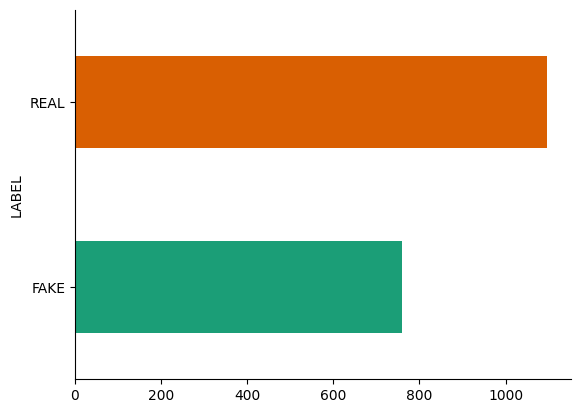

In [34]:
fake_real_graph(df2)



In [35]:
# Combined dataset has been Cleaned and Preprocessed.
df2.to_csv('combined_translated.csv',index = False )

# Translate MVD Dataset

In [36]:
mvd = pd.read_csv('https://raw.githubusercontent.com/skywalker290/Misleading-Video-Detection-Model/main/Datasets/Updated_MVD.csv?token=GHSAT0AAAAAACOAQOPG73KKJ7PVIRURGIAUZPURYUA')

In [ ]:
mvd

In [ ]:
df3 = dataframe_translate(mvd,['title','description'])
df3

In [70]:
df3.to_csv('translated_mvd.csv',index = False)

# Translate BollyBait

In [71]:
bolly = pd.read_csv('https://raw.githubusercontent.com/skywalker290/Misleading-Video-Detection-Model/main/Datasets/Updated_BollyBAIT.csv?token=GHSAT0AAAAAACOAQOPGUF4XBSJABABSNU3AZPUTP4A')

In [75]:
df4 = dataframe_translate(bolly,['title','description'])

Translating: 100%|██████████| 1686/1686 [01:57<00:00, 14.35it/s] 


In [ ]:
df4

In [77]:
df4.to_csv('translate_bollybait.csv',index = False)